# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import Dataset

In [2]:
df = pd.read_csv('data/carprice.csv', index_col= 'ID')

df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90


# 3. Exploratory Data Analysis (EDA)

### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5953 entries, 1 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5953 non-null   object 
 1   Location           5953 non-null   object 
 2   Year               5953 non-null   int64  
 3   Kilometers_Driven  5953 non-null   int64  
 4   Fuel_Type          5953 non-null   object 
 5   Transmission       5953 non-null   object 
 6   Owner_Type         5953 non-null   object 
 7   Mileage_kmpl       5951 non-null   float64
 8   Engine_CC          5917 non-null   float64
 9   Power_bhp          5811 non-null   float64
 10  Seats              5911 non-null   float64
 11  Price              5953 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 604.6+ KB


In [4]:
df.shape

(5953, 12)

### Data Description

In [5]:
df.describe()

,Year,Kilometers_Driven,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
count,5953.000000,5.953000e+03,5951.000000,5917.000000,5811.000000,5911.000000,5953.000000
mean,2013.356459,5.876729e+04,18.064325,1627.298293,113.803144,5.281509,9.547306
std,3.275069,9.174384e+04,4.511393,601.584633,53.896719,0.810628,11.230163
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.100000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.120000,1495.000000,98.600000,5.000000,5.700000
75%,2016.000000,7.300000e+04,21.025000,1991.000000,139.010000,5.000000,10.000000
max,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,160.000000


In [6]:
df.describe(include= 'O')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,5953,5953,5953,5953,5953
unique,1849,11,3,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,772,3205,4233,4876


### Check Missing Value

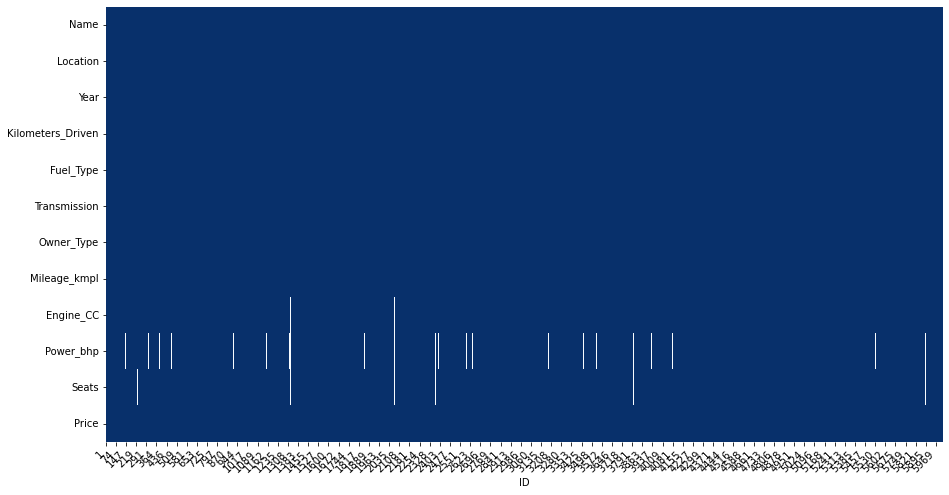

In [7]:
plot_missing_value(df)

`Dataset has a missing value that can be handled by imputing the value by default with 'Median' for numerical and 'Most_frequent' for categorical in Pipeline.`

Columns list with Missing Value:
1. Engine_CC (Numerical)
2. Power_bhp (Numerical)
3. Seats     (Categorical)
4. Mileage_kmpl (Numerical)

## Adding Feature

In [8]:
df['Company_Name'] = df['Name'].apply(lambda x: x.split()[0])

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_Name
ID,,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan


In [9]:
df.Company_Name.unique()

array(['Hyundai', 'Honda', 'Maruti', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [10]:
df['Company_Name'] = df['Company_Name'].replace('ISUZU', 'Isuzu')

In [11]:
df.drop(columns='Name', inplace = True)

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_Name
ID,,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan


In [12]:
# Current Year

df['Age_of_Car'] = 2021 - df.Year
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_Name,Age_of_Car
ID,,,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,6
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,10
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,9
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,8
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan,8


### Car Price in 2021
`I got information of Indian inflation in September 2021 is 4.89% (When EDA was made)`

Source: https://www.statista.com/statistics/271322/inflation-rate-in-india/

In [13]:
df['Current_Price'] = df.Price + df.Price*0.0489 

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_Name,Age_of_Car,Current_Price
ID,,,,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,6,13.111250
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,10,4.720050
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,9,6.293400
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,8,18.607486
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan,8,3.671150


In [14]:
df.drop(columns='Price', inplace = True)

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Company_Name,Age_of_Car,Current_Price
ID,,,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,6,13.111250
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,10,4.720050
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,9,6.293400
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,8,18.607486
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,Nissan,8,3.671150


The `Price` column is dropped because I have a new price in the dataset as a `Current_Price`

In [15]:
df.shape

(5953, 13)

## A. Numerical Features

In [16]:
df.describe()

,Year,Kilometers_Driven,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Age_of_Car,Current_Price
count,5953.000000,5.953000e+03,5951.000000,5917.000000,5811.000000,5911.000000,5953.000000,5953.000000
mean,2013.356459,5.876729e+04,18.064325,1627.298293,113.803144,5.281509,7.643541,10.014169
std,3.275069,9.174384e+04,4.511393,601.584633,53.896719,0.810628,3.275069,11.779318
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,2.000000,0.461516
25%,2011.000000,3.400000e+04,15.100000,1198.000000,78.000000,5.000000,5.000000,3.671150
50%,2014.000000,5.300000e+04,18.120000,1495.000000,98.600000,5.000000,7.000000,5.978730
75%,2016.000000,7.300000e+04,21.025000,1991.000000,139.010000,5.000000,10.000000,10.489000
max,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,23.000000,167.824000


In [17]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Company_Name,Age_of_Car,Current_Price
ID,,,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,6,13.111250
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,10,4.720050
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,9,6.293400
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,8,18.607486
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,Nissan,8,3.671150


In [18]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats',
       'Company_Name', 'Age_of_Car', 'Current_Price'],
      dtype='object')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

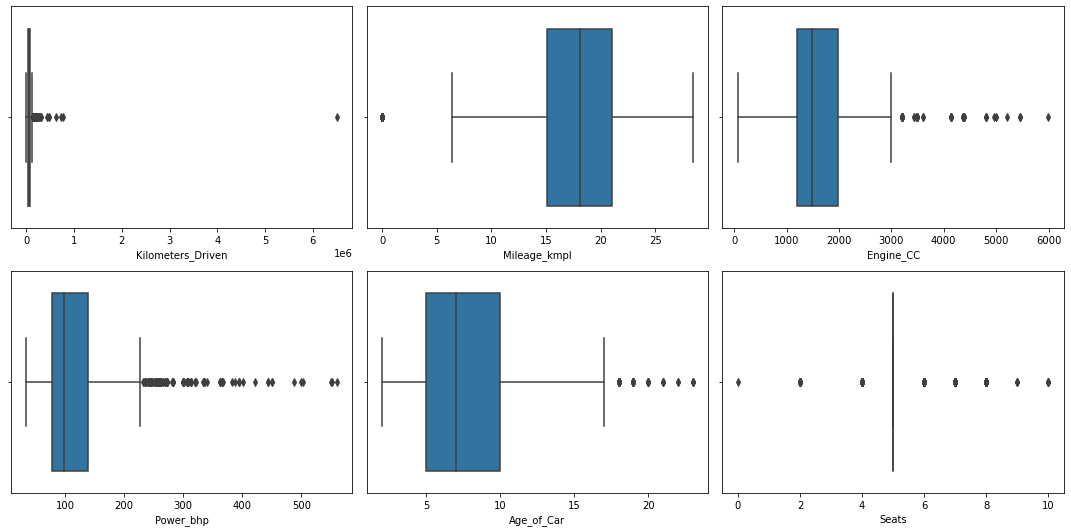

In [19]:
fig, axs = plt.subplots(2,3, figsize = (15,7.5))
sns.boxplot(df['Kilometers_Driven'], ax = axs[0,0])
sns.boxplot(df['Mileage_kmpl'], ax = axs[0,1])
sns.boxplot(df['Engine_CC'], ax = axs[0,2])
sns.boxplot(df['Power_bhp'], ax = axs[1,0])
sns.boxplot(df['Age_of_Car'], ax = axs[1,1])
sns.boxplot(df['Seats'], ax = axs[1,2])


plt.tight_layout()
plt.show()

`After checking each column, several outliers can be handled.`

### Handling outliers in Kilometers_Driven

### Outlier Detection

In [20]:
list_data = df['Kilometers_Driven'].tolist()
Q1 = np.quantile(list_data, .25)
Q2 = np.quantile(list_data, .50)
Q3 = np.quantile(list_data, .75)

IQR = (Q3 - Q1) * 1.5
Lower_limit= Q1-IQR
Upper_limit = Q3+IQR

def find_outlier(yourlist):
    outlier = []
    for i in range(len(yourlist)):
        if yourlist[i] > Upper_limit:
            outlier.append(yourlist[i])
        if yourlist[i] < Lower_limit:
            outlier.append(yourlist[i])
        
    return outlier

In [21]:
find_outlier(list_data)

[262000,
 178000,
 230000,
 136997,
 147898,
 131765,
 216000,
 200000,
 160538,
 143275,
 158000,
 138000,
 160000,
 775000,
 133944,
 620000,
 143017,
 162663,
 179000,
 137000,
 179000,
 202082,
 137000,
 200000,
 170000,
 146824,
 205000,
 157000,
 215000,
 150000,
 132000,
 146000,
 134000,
 176000,
 138000,
 225000,
 248000,
 172050,
 170000,
 153000,
 145000,
 148000,
 231673,
 177000,
 165000,
 152000,
 194000,
 299322,
 148000,
 150000,
 135000,
 135000,
 137008,
 156347,
 146300,
 160000,
 169000,
 160000,
 133000,
 150000,
 220000,
 166194,
 140000,
 255000,
 720000,
 190000,
 282000,
 173000,
 190000,
 162000,
 196000,
 170428,
 150386,
 152000,
 149706,
 215750,
 135000,
 140000,
 6500000,
 160000,
 234000,
 150000,
 143354,
 150000,
 171000,
 144000,
 137800,
 145000,
 166000,
 179032,
 180000,
 178280,
 160000,
 200000,
 136000,
 150000,
 480000,
 150000,
 140000,
 135000,
 144000,
 150000,
 240000,
 148009,
 150000,
 480000,
 156056,
 135000,
 150000,
 150000,
 158793,


`The possible outlier is 6500000, and I assume the other numbers are the way they're supposed to be. I want to handle this outlier.`

In [22]:
df[df.Kilometers_Driven > 1000000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Company_Name,Age_of_Car,Current_Price
ID,,,,,,,,,,,,,
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,BMW,4,68.1785


In [23]:
df[(df.Year == 2017) & (df.Kilometers_Driven == 65000)]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Company_Name,Age_of_Car,Current_Price
ID,,,,,,,,,,,,,
2387,Delhi,2017,65000,Diesel,Manual,First,25.47,1248.0,88.5,7.0,Maruti,4,8.024085
5279,Kolkata,2017,65000,Petrol,Manual,First,17.57,1193.0,88.7,5.0,Tata,4,5.034720


`I think the value of 6500000 in the dataset is because typing error. Maybe it is 65000, not 6500000. Therefore, I want to replace it to 65000`

In [24]:
df['Kilometers_Driven'] = df['Kilometers_Driven'].replace(6500000,65000)

### Handling outliers in Mileage_kmpl

In [25]:
df.Mileage_kmpl.min()

0.0

In [26]:
df['Mileage_kmpl'] = df['Mileage_kmpl'].replace(0.0, df['Mileage_kmpl'].median())

`It's doesn't make sense if Mileage is 0. Therefore, I replace this outlier with the median.`

### Handling outliers in Seats

In [27]:
df[df.Seats == 0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Company_Name,Age_of_Car,Current_Price
ID,,,,,,,,,,,,,
3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,Audi,9,18.8802


In [28]:
df[df.Company_Name == 'Audi']

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Company_Name,Age_of_Car,Current_Price
ID,,,,,,,,,,,,,
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,8,18.607486
22,Mumbai,2015,55985,Petrol,Automatic,First,13.53,1984.0,177.01,5.0,Audi,6,24.649150
33,Kolkata,2010,35000,Diesel,Automatic,First,12.40,2698.0,179.50,5.0,Audi,11,12.062350
50,Kochi,2015,13648,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,Audi,6,22.477927
65,Jaipur,2012,65664,Diesel,Automatic,First,16.55,1968.0,140.00,5.0,Audi,9,14.160150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,Delhi,2011,57000,Diesel,Automatic,Second,16.55,1968.0,147.51,5.0,Audi,10,10.226775
5927,Coimbatore,2018,29091,Diesel,Automatic,First,13.22,2967.0,241.40,5.0,Audi,3,47.745928
5950,Bangalore,2014,65630,Diesel,Automatic,First,15.73,1968.0,174.33,5.0,Audi,7,22.813575


`Cars that don't have seats is doesn't make sense. I think this happened because typing error. Maybe it is 5, not 0. Therefore, I want to replace it with 5.`

In [29]:
df['Seats'] = df['Seats'].replace(0.0, 5)

### Data Distribution

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

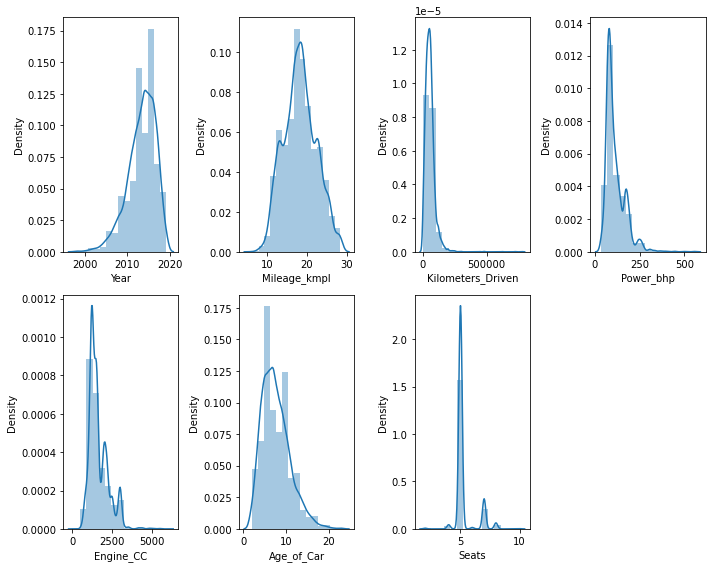

In [30]:
numeric = ['Year','Mileage_kmpl','Kilometers_Driven','Power_bhp','Engine_CC','Age_of_Car','Seats']

x = plt.figure(figsize=(10, 8))

for i, j in enumerate(numeric):
    x.add_subplot(2, 4, i+1)
    sns.distplot(df[j], bins=15)
    x.tight_layout()

plt.tight_layout()

**Insight**

Several columns are indicated to have skew. That means data isn't normally distributed.

The Column having skew:
1. Power_bhp (Positively Skewed)
2. Engine_CC (Positively Skewed)
3. Kilometers_Driven (Positively Skewed)

`Although several columns have a skew, I don't handle it because maybe the number of values is supposed to be. But, if the model has a higher error value, I'll address that in the evaluation part.`

### Annual Car Distribution

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


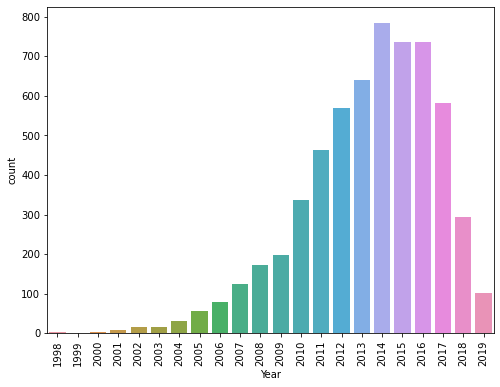

In [31]:
plt.figure(figsize=(8, 6))
plot = sns.countplot(df.Year)
plt.setp(plot.get_xticklabels(), rotation=90);

### Current Price Distribution (Target)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Current_Price'>

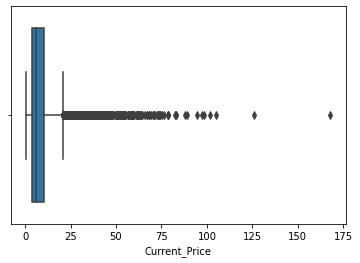

In [32]:
sns.boxplot(df['Current_Price'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Current_Price', ylabel='Density'>

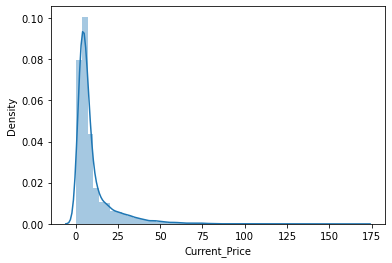

In [33]:
sns.distplot(df['Current_Price'], kde = True)

## Numeric vs Target

### Year vs Current_Price

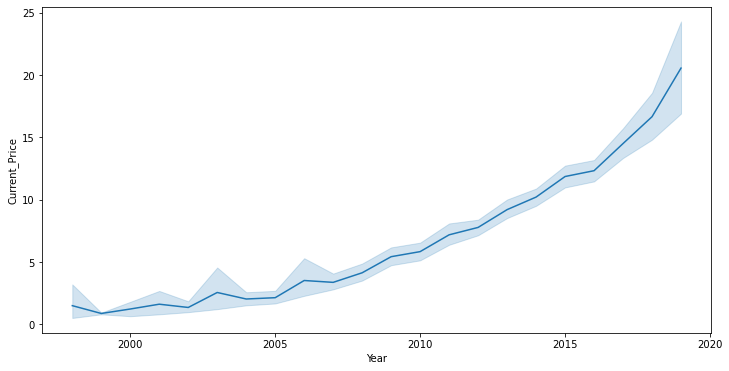

In [34]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='Year', y = 'Current_Price', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### Age_of_Car vs Current_Price

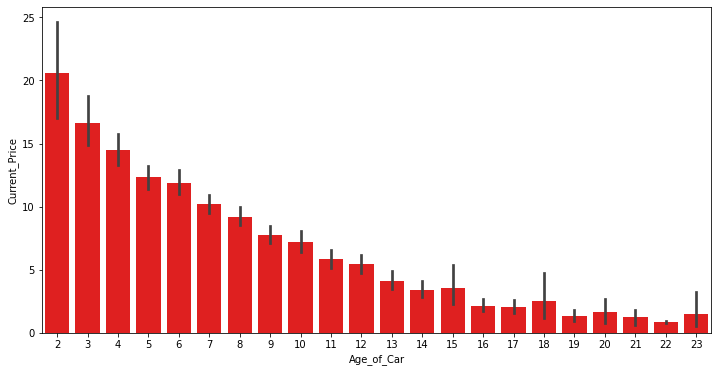

In [35]:
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Age_of_Car', y = 'Current_Price', color= 'red', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### Seats vs Current Price

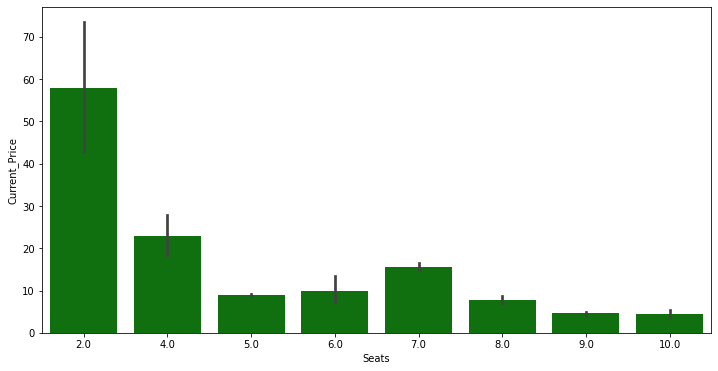

In [36]:
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Seats', y = 'Current_Price', color= 'g', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### Power_bhp vs Current_Price

In [37]:
c = df.groupby('Year').agg({'Power_bhp':'mean', 'Current_Price':'mean'})
c

,Power_bhp,Current_Price
Year,,
1998,92.566667,1.502549
1999,75.000000,0.875832
2000,60.775000,1.232457
2001,86.950000,1.619239
2002,61.372727,1.357277
2003,82.000000,2.559316
2004,93.748000,2.036219
2005,105.446512,2.141442
2006,109.868182,3.520001


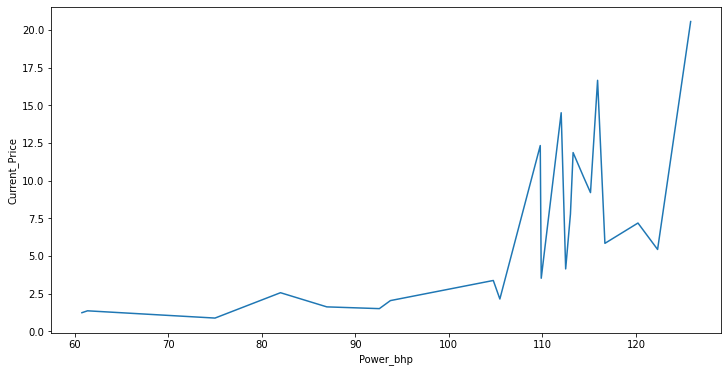

In [38]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='Power_bhp', y = 'Current_Price', data=c)
plt.setp(plot.get_xticklabels(), rotation=0);

### Engine_CC vs Current_Price

In [39]:
d = df.groupby('Year').agg({'Engine_CC':'mean', 'Current_Price':'mean'})
d

,Engine_CC,Current_Price
Year,,
1998,1188.000000,1.502549
1999,1168.000000,0.875832
2000,1817.000000,1.232457
2001,1625.428571,1.619239
2002,1336.714286,1.357277
2003,1466.066667,2.559316
2004,1525.413793,2.036219
2005,1675.981818,2.141442
2006,1682.880000,3.520001


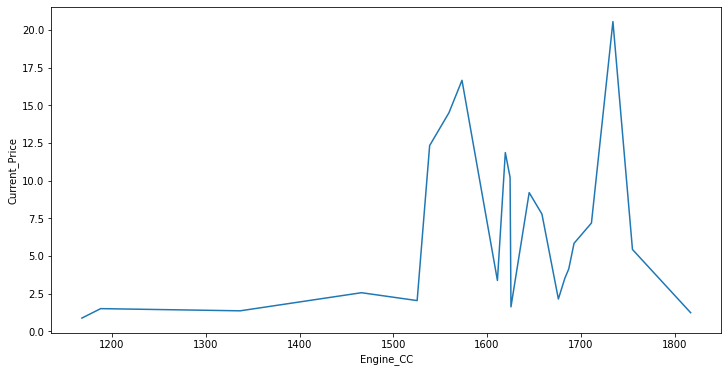

In [40]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='Engine_CC', y = 'Current_Price', data=d)
plt.setp(plot.get_xticklabels(), rotation=0);

### Mileage_kmpl vs Car_Price

In [41]:
plt.style.use('fivethirtyeight')

In [42]:
f = df.groupby('Year').agg({'Mileage_kmpl':'mean', 'Current_Price':'mean'})
f

,Mileage_kmpl,Current_Price
Year,,
1998,14.900000,1.502549
1999,15.150000,0.875832
2000,15.267500,1.232457
2001,15.430000,1.619239
2002,16.958667,1.357277
2003,15.736471,2.559316
2004,15.405806,2.036219
2005,14.638393,2.141442
2006,15.414487,3.520001


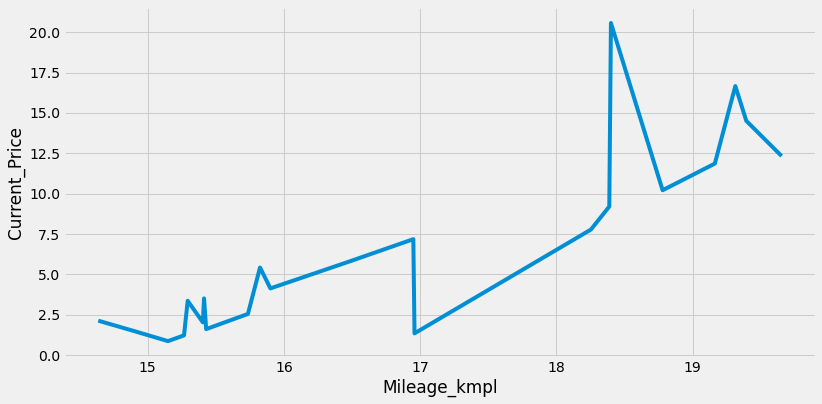

In [43]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='Mileage_kmpl', y = 'Current_Price', data=f)
plt.setp(plot.get_xticklabels(), rotation=0);

### Kilometers_Driven vs Current_Price

In [44]:
g = df.groupby('Year').agg({'Kilometers_Driven':'mean', 'Current_Price':'mean'})
g

,Kilometers_Driven,Current_Price
Year,,
1998,87400.000000,1.502549
1999,105000.000000,0.875832
2000,112500.000000,1.232457
2001,139742.875000,1.619239
2002,75354.066667,1.357277
2003,81862.411765,2.559316
2004,103154.290323,2.036219
2005,92816.214286,2.141442
2006,97208.102564,3.520001


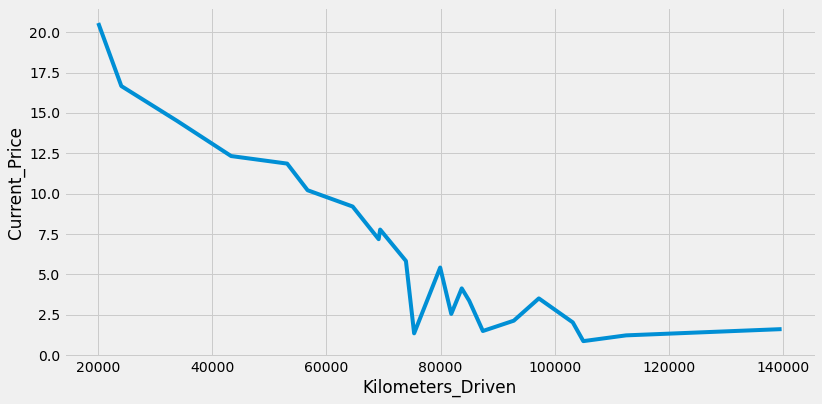

In [45]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='Kilometers_Driven', y = 'Current_Price', data=g)
plt.setp(plot.get_xticklabels(), rotation=0);

## B. Categorical Features

### Categorical Distribution

In [46]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats',
       'Company_Name', 'Age_of_Car', 'Current_Price'],
      dtype='object')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

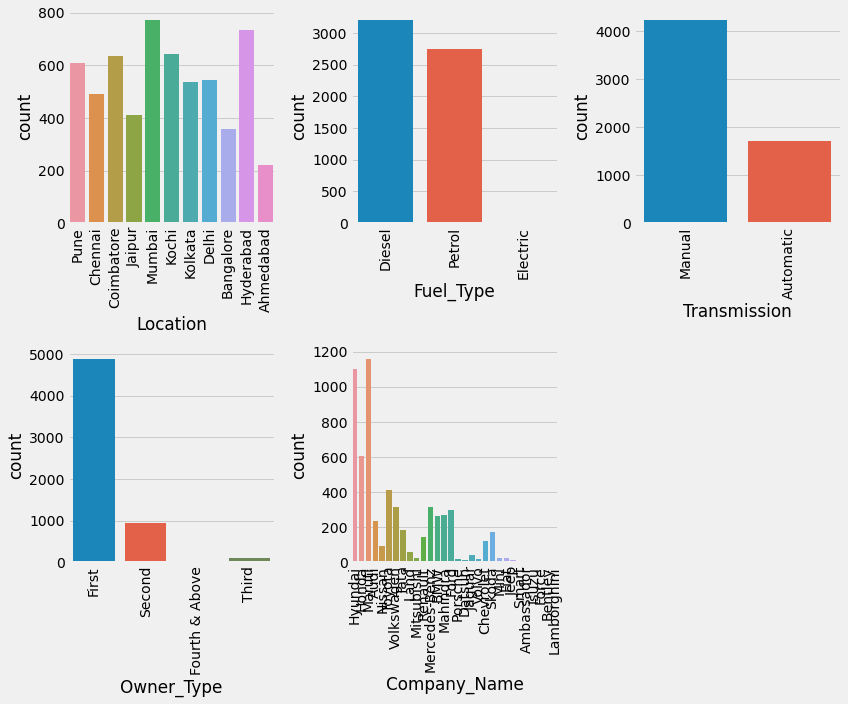

In [47]:
features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type','Company_Name']

canvas = plt.figure(figsize=(12, 10))

for i, j in enumerate(features):
    canvas.add_subplot(2, 3, i+1)
    plot = sns.countplot(df[j])
    plt.setp(plot.get_xticklabels(), rotation=90)
    canvas.tight_layout()

**Insight**

The plot gives an insight:
1. Frequency mostly from Mumbai and followed by Hyderabad
2. Fuel type mostly using Diesel 
3. Transmission mostly using Manual than Automatic
4. First-time car owners have a higher car distribution than others
5. Maruti company selling the cars more than others and followed by Honda 

## Categoric vs Target

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

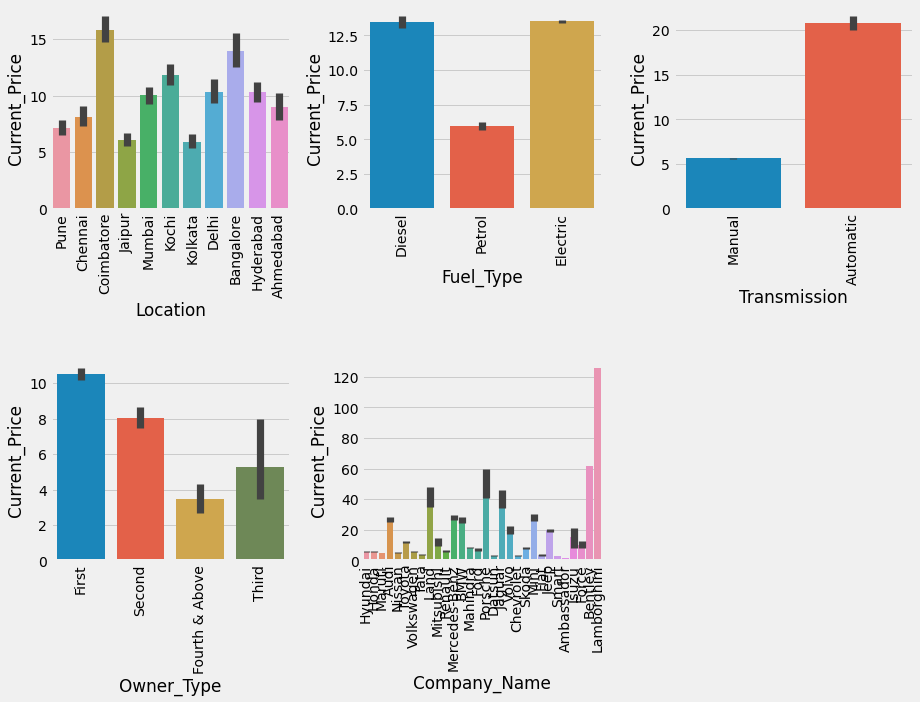

In [48]:
features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type','Company_Name']

a = plt.figure(figsize=(13, 13))

for i, j in enumerate(features):
    a.add_subplot(3, 3, i+1)
    plot = sns.barplot(df[j], y='Current_Price', data=df)
    plt.setp(plot.get_xticklabels(), rotation=90)
    a.tight_layout()

**Insight**

1. The highest car price in Coimbatore
2. Diesel and Electric have a similar average price
3. Average of Automatic transmission has a higher price than Manual 
4. The highest price of cars is that from first owners
5. Lamborghini have a higher average price than others

## Correlation Matrix

In [49]:
from jcopml.plot import plot_correlation_matrix

In [50]:
plot_correlation_matrix(df,target_col='Current_Price', numeric_col= numeric)

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

`Because Github can't display the correlation plot, I've captured a picture of it.`

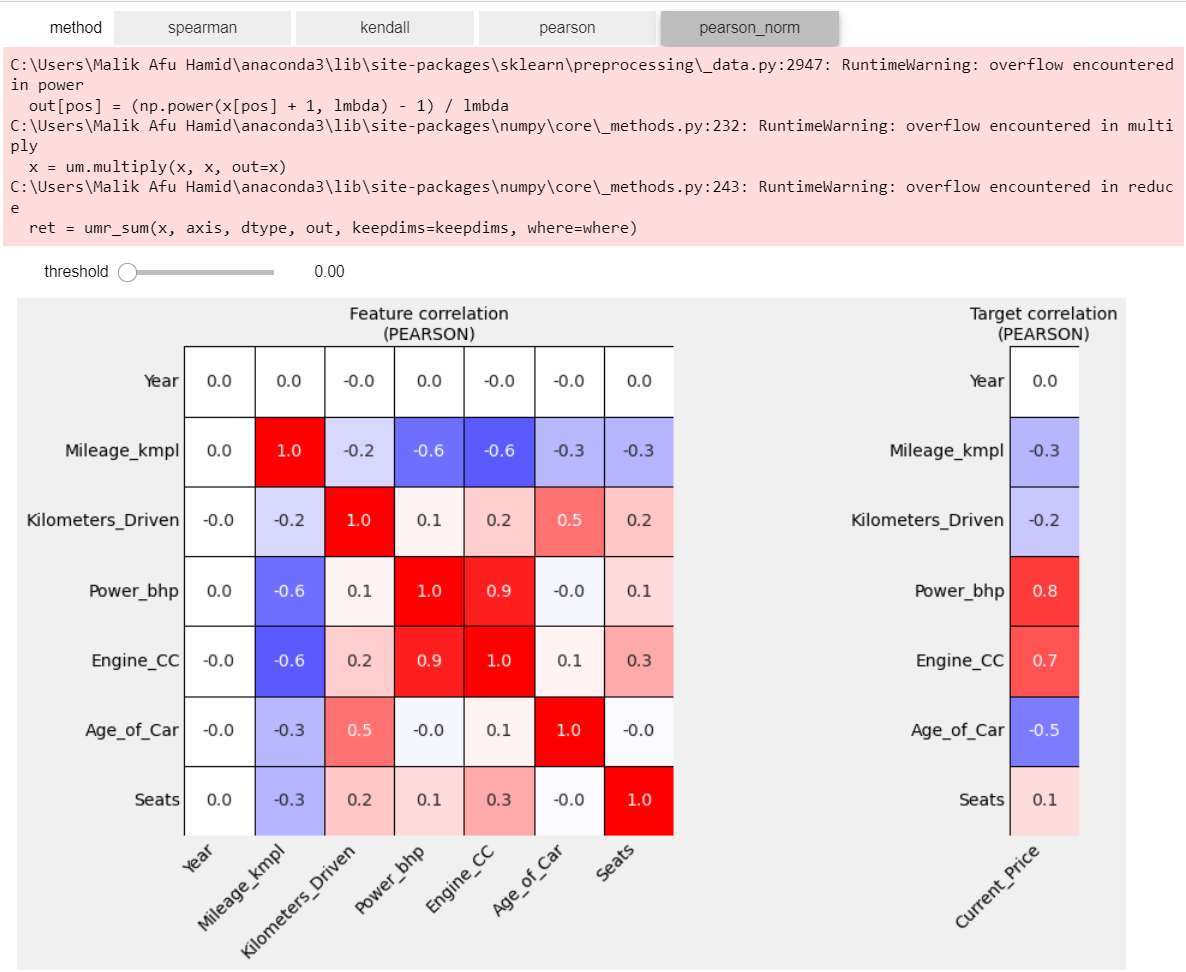

# 4. Dataset Splitting

In [51]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Company_Name,Age_of_Car,Current_Price
ID,,,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,6,13.111250
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,10,4.720050
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,9,6.293400
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,8,18.607486
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,Nissan,8,3.671150


In [52]:
X = df.drop(columns="Current_Price")
y = df.Current_Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4762, 12), (1191, 12), (4762,), (1191,))

# 5. Modeling

In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [54]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling= 'standard'), ['Year','Kilometers_Driven','Mileage_kmpl','Engine_CC','Power_bhp','Age_of_Car','Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Location','Fuel_Type','Transmission','Owner_Type','Company_Name'])
])



pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])



model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 41.68322557207821, 'algo__gamma': 0.01972087430240293}
0.9092306947638539 0.8758588551832698 0.8615291626669601


# 6. Feature Importance

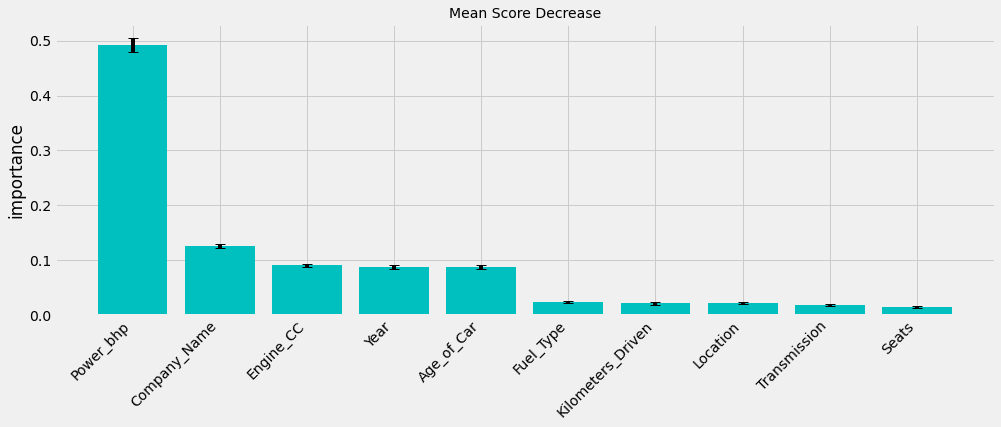

In [55]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

In [56]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling= 'standard'), ['Power_bhp','Engine_CC', 'Year','Age_of_Car','Kilometers_Driven', 'Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Company_Name','Fuel_Type','Location','Transmission'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])



model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 41.68322557207821, 'algo__gamma': 0.01972087430240293}
0.8866777205324274 0.874790141404161 0.8433827766326234


`So the Feature Importance decreases test scores models. Thus, I keep taking all of the columns.`

# 7. Polynomial Features

In [57]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling= 'standard', poly=2), ['Year','Kilometers_Driven','Mileage_kmpl','Engine_CC','Power_bhp','Age_of_Car','Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Location','Fuel_Type','Transmission','Owner_Type','Company_Name'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model = RandomizedSearchCV(pipeline, rsp.svm_poly_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 27.507591274077157, 'algo__gamma': 0.026879235628905096, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.9100266399186723 0.8587266356247145 0.8625751591401156


`The polynomial feature can increase test scores more than models that don't.`

# 8. Hyperparameter Tuning

In [58]:
from jcopml.tuning.space import Integer, Real

In [59]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling= 'standard', poly=2), ['Year','Kilometers_Driven','Mileage_kmpl','Engine_CC','Power_bhp','Age_of_Car','Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Location','Fuel_Type','Transmission','Owner_Type','Company_Name'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


parameter = {'prep__numeric__poly__degree': Integer(low=1, high=3),
             'prep__numeric__poly__interaction_only': [True, False],
             'algo__gamma': Real(low=-3, high=4, prior='log-uniform'),
             'algo__C': Real(low=-3, high=3, prior='log-uniform')}


model1 = RandomizedSearchCV(pipeline, parameter, cv=5, n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model1.fit(X_train, y_train)

print(model1.best_params_)
print(model1.score(X_train, y_train), model1.best_score_, model1.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 27.507591274077157, 'algo__gamma': 0.04652143117786274, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.921315402141063 0.8450128862812957 0.8663209271343013


# 9. Evaluation 

In [60]:
from jcopml.plot import plot_residual
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


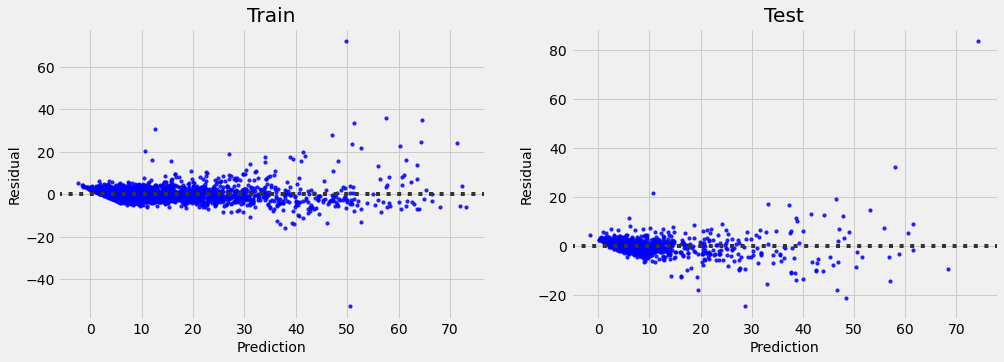

In [61]:
plot_residual(X_train, y_train, X_test, y_test, model1)

`The residual plot figures out the dataset have outliers that cause the data not to be spread equally. Maybe this problem can be handled by transforming the data by using yeo-johnson.`

## Error Checking

In [62]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error', ascending=False).head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Company_Name,Age_of_Car,pred,actual,error
ID,,,,,,,,,,,,,,,
4079,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.00,5.0,Land,4,73.280337,167.824000,94.543663
1984,Bangalore,2017,17465,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,BMW,4,61.079979,97.547700,36.467721
3059,Delhi,2019,87000,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,BMW,2,33.673089,6.996163,26.676926
3043,Coimbatore,2019,25899,Diesel,Automatic,First,12.63,2179.0,147.50,5.0,Land,2,36.415514,58.423730,22.008216
327,Coimbatore,2017,97430,Diesel,Automatic,First,14.75,2967.0,245.00,7.0,Audi,4,43.911483,65.734563,21.823080
473,Kochi,2018,26405,Petrol,Automatic,First,12.60,1950.0,191.34,5.0,Mercedes-Benz,3,34.046532,53.944927,19.898395
2659,Kolkata,2015,25100,Diesel,Automatic,First,17.85,2967.0,300.00,4.0,Porsche,6,60.235483,78.667500,18.432017
5082,Delhi,2011,31000,Petrol,Automatic,First,10.90,2497.0,215.00,5.0,BMW,10,14.122480,32.515900,18.393420
282,Kochi,2018,11287,Diesel,Automatic,First,12.07,2967.0,241.40,7.0,Audi,3,55.612607,73.800604,18.187997


`Eliminate the number that has the highest error value to make a better model`

In [63]:
df = df[df['Current_Price'] < 167.824000]

## Dataset Splitting

In [64]:
X = df.drop(columns="Current_Price")
y = df.Current_Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4761, 12), (1191, 12), (4761,), (1191,))

## Modeling

In [65]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling= 'standard', poly=2), ['Year','Kilometers_Driven','Mileage_kmpl','Engine_CC','Power_bhp','Age_of_Car','Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Location','Fuel_Type','Transmission','Owner_Type','Company_Name'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


parameter = {'prep__numeric__poly__degree': Integer(low=1, high=3),
             'prep__numeric__poly__interaction_only': [True, False],
             'algo__gamma': Real(low=-3, high=4, prior='log-uniform'),
             'algo__C': Real(low=-3, high=3, prior='log-uniform')}



model2 = RandomizedSearchCV(pipeline, parameter, cv=5, n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model2.fit(X_train, y_train)

print(model2.best_params_)
print(model2.score(X_train, y_train), model2.best_score_, model2.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 27.507591274077157, 'algo__gamma': 0.04652143117786274, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.9299758056340871 0.8535031246277496 0.9021307750666789


### Try to transform the data with yeo-johnson

In [66]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling= 'standard', poly=2, transform='yeo-johnson'), ['Year','Kilometers_Driven','Mileage_kmpl','Engine_CC','Power_bhp','Age_of_Car','Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Location','Fuel_Type','Transmission','Owner_Type','Company_Name'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


parameter = {'prep__numeric__poly__degree': Integer(low=1, high=3),
             'prep__numeric__poly__interaction_only': [True, False],
             'algo__gamma': Real(low=-3, high=4, prior='log-uniform'),
             'algo__C': Real(low=-3, high=3, prior='log-uniform')}



model = RandomizedSearchCV(pipeline, parameter, cv=5, n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

C:\Users\Malik Afu Hamid\AppData\Roaming\Python\Python39\site-packages\jcopml\pipeline\_pipeline.py:65: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:3218: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 27.507591274077157, 'algo__gamma': 0.04652143117786274, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.9210380024553207 0.8615515725235884 0.9008559533110247


`Transforming the data by using yeo-johnson can't increase test score model`

In [67]:
df_analysis2 = X_test.copy()
df_analysis2['pred']  = model.predict(X_test)
df_analysis2['actual'] = y_test
df_analysis2['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis2.sort_values('error').head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Company_Name,Age_of_Car,pred,actual,error
ID,,,,,,,,,,,,,,,
3402,Hyderabad,2012,42600,Diesel,Manual,First,23.00,1396.0,90.00,5.0,Hyundai,9,3.142116,5.234011,0.000431
109,Kolkata,2014,40000,Diesel,Automatic,First,22.32,1582.0,126.32,5.0,Hyundai,7,4.965160,5.506725,0.001086
2809,Mumbai,2010,55000,Petrol,Manual,Second,19.81,1086.0,68.05,5.0,Hyundai,11,3.120549,1.667751,0.002873
4007,Chennai,2013,58581,Petrol,Manual,First,19.40,1198.0,86.80,5.0,Honda,8,4.007128,3.660661,0.006755
3038,Hyderabad,2013,48183,Diesel,Automatic,First,13.20,1995.0,170.00,5.0,BMW,8,21.664918,22.016411,0.009420
1264,Kochi,2015,51535,Diesel,Automatic,First,12.55,2982.0,168.50,7.0,Toyota,6,20.156375,19.960567,0.009932
5824,Delhi,2012,52000,Petrol,Manual,First,18.90,998.0,67.10,5.0,Maruti,9,2.796991,2.569805,0.013264
4211,Kochi,2012,63998,Petrol,Automatic,First,17.00,1497.0,118.00,5.0,Honda,9,5.505915,5.685038,0.016383
1152,Chennai,2013,79000,Petrol,Manual,First,18.90,998.0,67.10,5.0,Maruti,8,4.006671,3.146700,0.022274


# 10. Summary Result

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.9299758056340871
R2 Test : 0.9021307750666789
MAE Train : 1.592176537225364
MAE Test : 2.0181669950847
MSE Train : 9.329653350526415
MSE Test : 13.691358960913975
RMSE Train : 3.0544481253618327
RMSE Test : 3.7001836388095626


# 11. Save Model

In [70]:
save_model(model.best_estimator_, "Car_Price_Prediction_SVR.pkl")

Model is pickled as model/Car_Price_Prediction_SVR.pkl
